In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana


In [20]:

fname = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/ASCAT_M36.ldas_log.20200601_0000z.txt'

In [21]:
# Open the file for reading
with open(fname, 'r') as f:
    # Initialize an empty list to store the extracted data
    data = []
    # Loop through each line in the file
    for line in f:
        # Check if the line starts with "Found!"
        if line.startswith('Found!'):
            # Extract the numbers in the remaining columns
            columns = line.strip().split()[1:]
            numbers = [float(col) for col in columns]
            # Append the numbers to the data list
            data.append(numbers)

In [22]:
# Convert the data list to a NumPy array
data_array = np.array(data)


In [23]:
# Split the 2D array into 10 separate arrays
i = data_array[:, 0]
pp = data_array[:, 1]
j_ind = data_array[:, 2]
i_ind = data_array[:, 3]
tmp_obs = data_array[:, 4]
sclprm_mean_obs = data_array[:, 5]
sclprm_std_mod = data_array[:, 6]
sclprm_std_obs = data_array[:, 7]
sclprm_mean_mod = data_array[:, 8]
tmp_std_obs = data_array[:, 9]

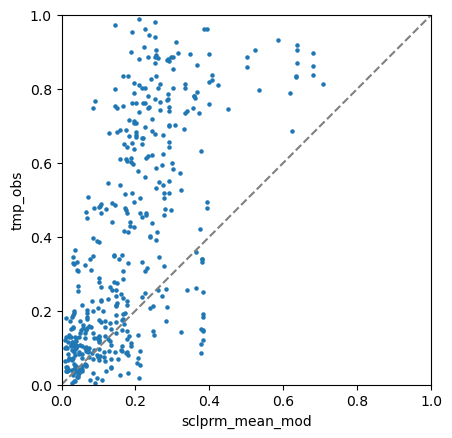

In [24]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=5)

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()


In [26]:
# Calculate tmpreal by dividing sclprm_std_mod by sclprm_std_obs
tmpreal = sclprm_std_mod / sclprm_std_obs

# Calculate tmp_obs2 using the formula sclprm_mean_mod + tmpreal*(tmp_obs-sclprm_mean_obs)
tmp_obs2 = sclprm_mean_mod + tmpreal * (tmp_obs - sclprm_mean_obs)

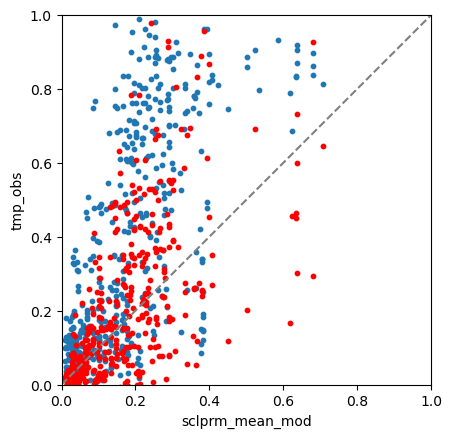

In [27]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=10)

# Create a scatter plot of tmp_obs2 against sclprm_mean_mod in a different color
plt.scatter(sclprm_mean_mod, tmp_obs2, s=10, c='r')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()



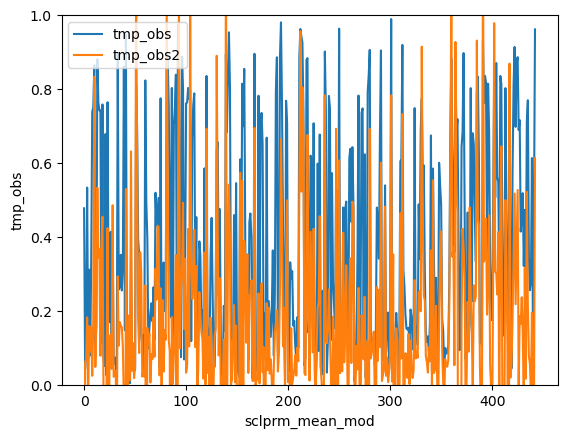

In [28]:
# Create a line plot of sclprm_mean_mod against tmp_obs
plt.plot(tmp_obs, label='tmp_obs')

# Create a line plot of sclprm_mean_mod against tmp_obs2 in a different color
plt.plot(tmp_obs2, label='tmp_obs2')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.ylim([0, 1])

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [2]:
# Read ObsFcstAna files
path = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M06'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna.201506'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar, pentad2 = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  1629620


In [6]:
# Open the netCDF file using xarray
ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')

In [17]:
date_time[9]['pentad'][0]

# for dt in date_time:
#     pentad = dt['pentad'][0]
#     print(pentad)

obs_lat[1]


68.20632934570312

In [17]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

n_obs = len(obs_obs)

i_ind = np.empty(n_obs, dtype=int)
j_ind = np.empty(n_obs, dtype=int)
pp = np.empty(n_obs, dtype=int)

for i in range(10):  #(len(obs_obs)):
    this_lon = obs_lon[i]
    this_lat = obs_lat[i]  
    i_ind[i] = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind[i] = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    
    sclprm_mean_obs = ds['o_mean'].sel(pentad = pentad2[i]).values



In [16]:
o_mean = ds['o_mean'].sel(pentad = pentad2[i]).values
o_mean[i_ind[0:5], j_ind[0:5]]

array([-9.99900000e+03, -9.99900000e+03, -9.99900000e+03,  8.63512346e-01,
       -9.99900000e+03])

In [5]:
# Read statistics file

# Select the variable of interest (o_mean) for pentad 31
o_mean = ds['o_mean'].sel(pentad=31)
o_std = ds['o_std'].sel(pentad=31)
m_mean = ds['m_mean'].sel(pentad=31)
m_std = ds['m_std'].sel(pentad=31)

lat = ds['lat']
lon = ds['lon'] 